# **Objectives of the Analysis**

1. Understand Current Turnover Rates: Gain a comprehensive understanding of
the current employee turnover rate and analyze the demographic distribution of
attrition by age, gender, education, department, and job role.
2. Identify Key Factors Influencing Turnover: Examine the main factors
contributing to employee attrition, including job satisfaction indicators (job
involvement and work-life balance), salary factors (monthly income and salary
hikes), and benefit factors (stock option levels), to uncover patterns and
correlations that drive higher attrition rates.
3.Model Building: With the help of model get the initial information of arttirion choice of the present employee.


**Loading the Requried Library**

In [ ]:
!pip install pycaret

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import *
import pickle as pc

In [ ]:
ds=pd.read_csv('/content/drive/MyDrive/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv') # loading the data

# **Data Cleaning**

In [ ]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
ds.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
ds.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
ds.duplicated().sum()

0

In [ ]:
ds.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


# **Objective 1: Understand Current Turnover Rates**

In [ ]:
ds['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [ ]:
attrition_rate=ds['Attrition'].value_counts(normalize=True)*100
print(attrition_rate)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


<Axes: xlabel='Attrition', ylabel='count'>

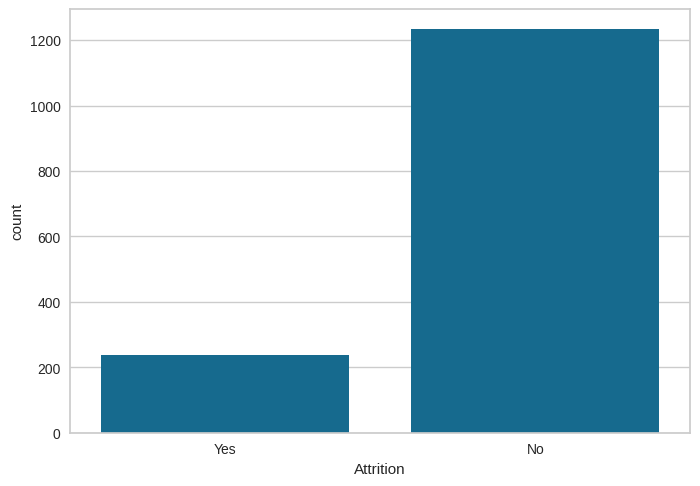

In [ ]:
sns.countplot(x=ds['Attrition'])

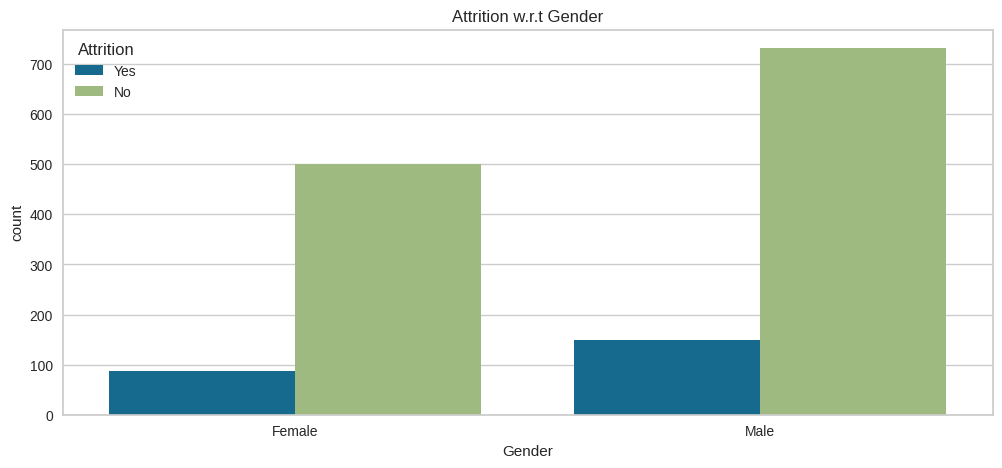

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',hue='Attrition',data=ds)
plt.title("Attrition w.r.t Gender")
plt.show()

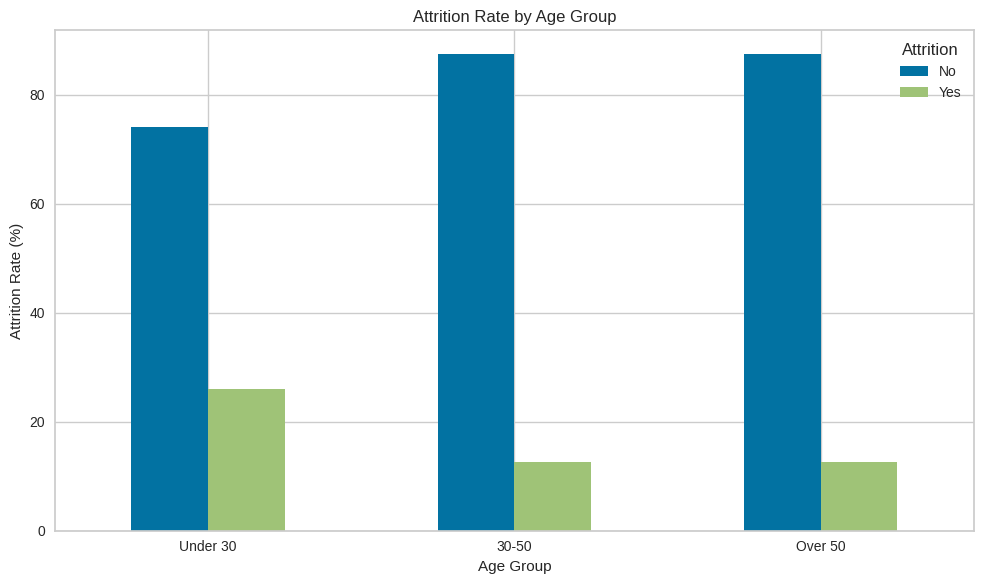

In [ ]:
ds['AgeGroup'] = pd.cut(ds['Age'], bins=[0, 30, 50, ds['Age'].max()], labels=['Under 30', '30-50', 'Over 50'])
attrition_by_age = ds.groupby('AgeGroup')['Attrition'].value_counts(normalize=True).unstack() * 100
attrition_by_age.plot(kind='bar', figsize=(10, 6))
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

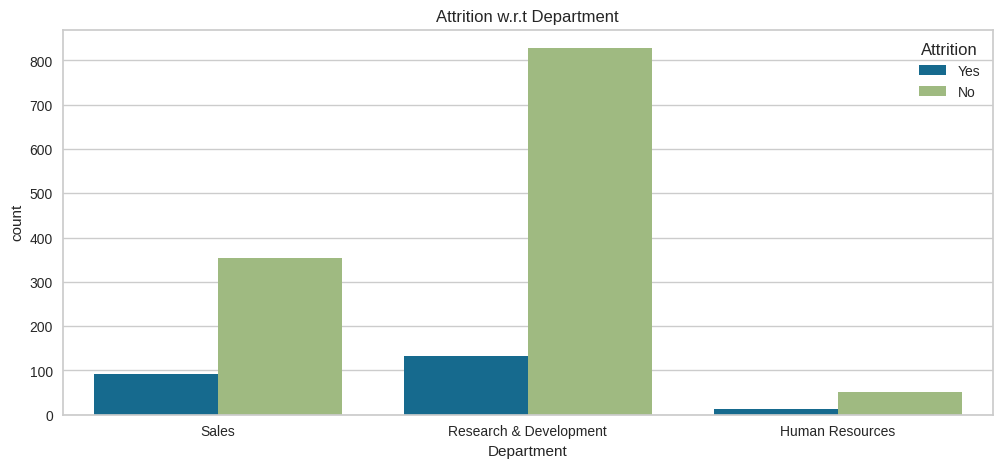

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition',data=ds)
plt.title("Attrition w.r.t Department")
plt.show()

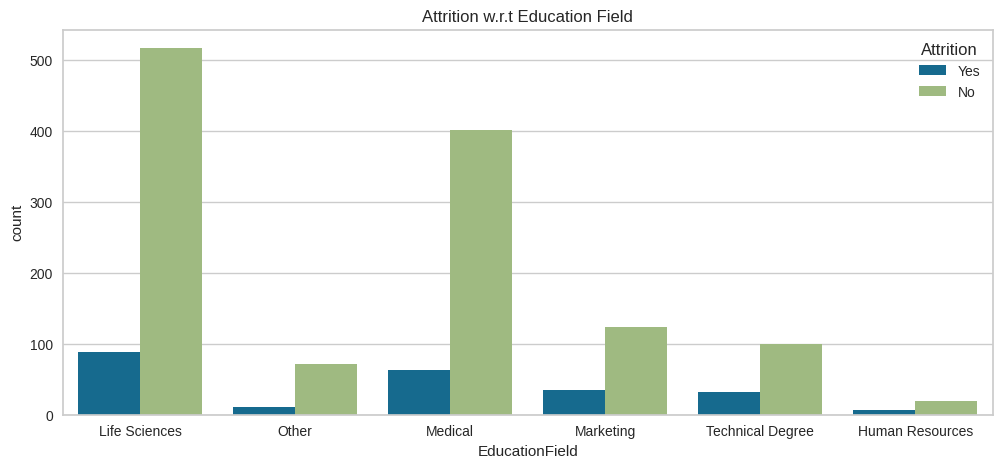

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='Attrition',data=ds)
plt.title("Attrition w.r.t Education Field")
plt.show()

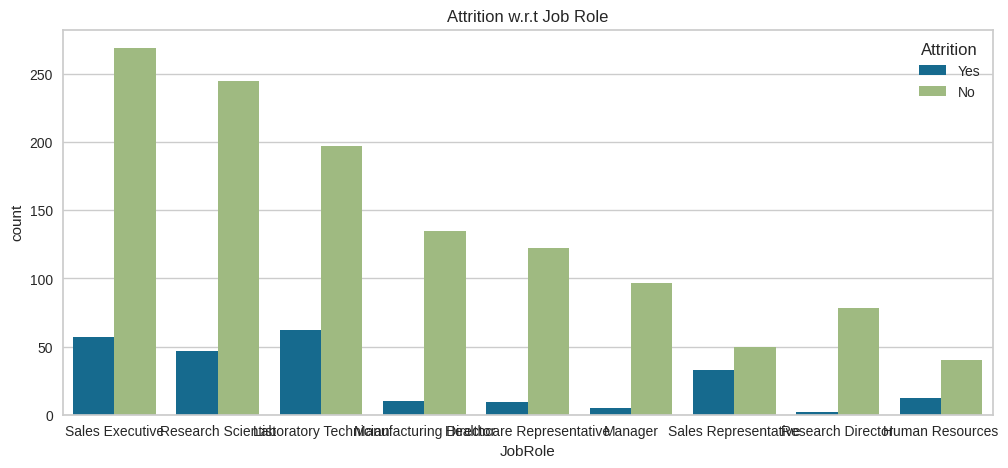

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='JobRole',hue='Attrition',data=ds)
plt.title("Attrition w.r.t Job Role")
plt.show()

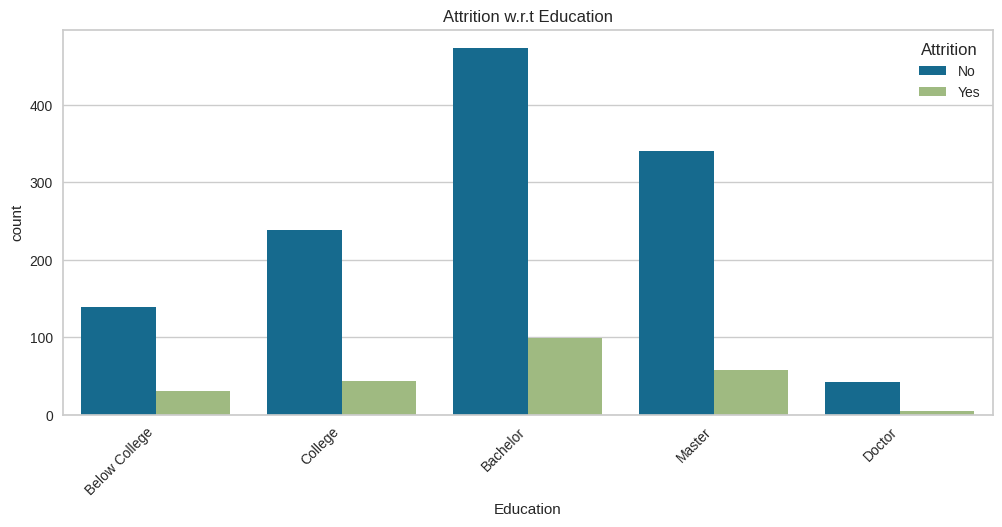

In [ ]:
edu_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='Education', hue='Attrition', data=ds)
ax.set_xticklabels([edu_map.get(int(x.get_text()), x.get_text()) for x in ax.get_xticklabels()])
plt.title("Attrition w.r.t Education")
plt.xticks(rotation=45, ha='right')
plt.show()

## **Objective 2: Identify Key Factors Influencing Turnover**

<Axes: xlabel='Attrition', ylabel='JobSatisfaction'>

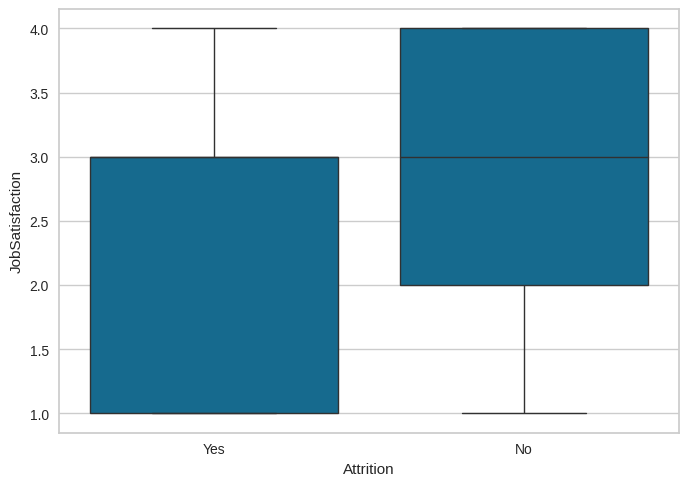

In [ ]:
sns.boxplot(x='Attrition', y='JobSatisfaction', data=ds)

<Axes: xlabel='Attrition', ylabel='WorkLifeBalance'>

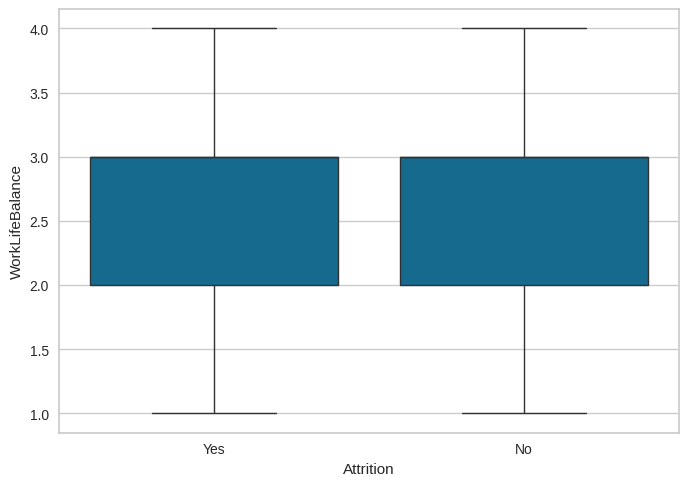

In [ ]:
sns.boxplot(x='Attrition', y='WorkLifeBalance', data=ds)

<Axes: xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

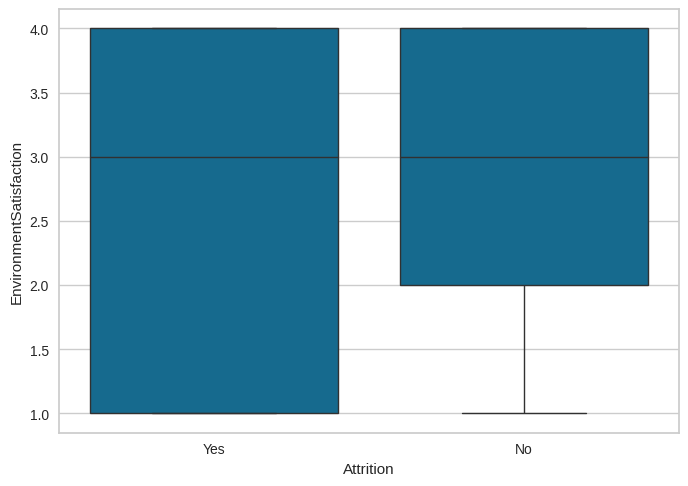

In [ ]:
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=ds)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

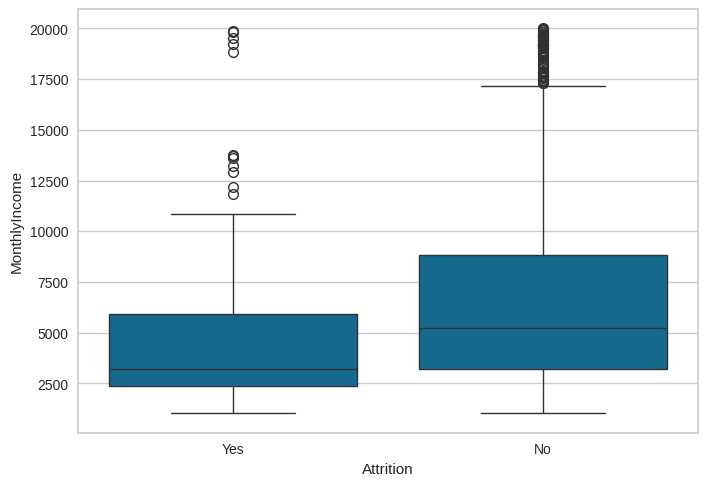

In [ ]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=ds)

<Axes: xlabel='Attrition', ylabel='RelationshipSatisfaction'>

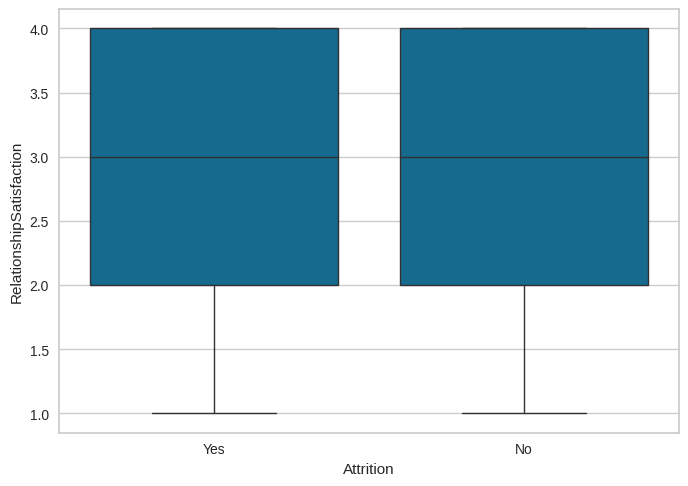

In [ ]:
sns.boxplot(x='Attrition', y='RelationshipSatisfaction', data=ds)

<Axes: xlabel='StockOptionLevel', ylabel='count'>

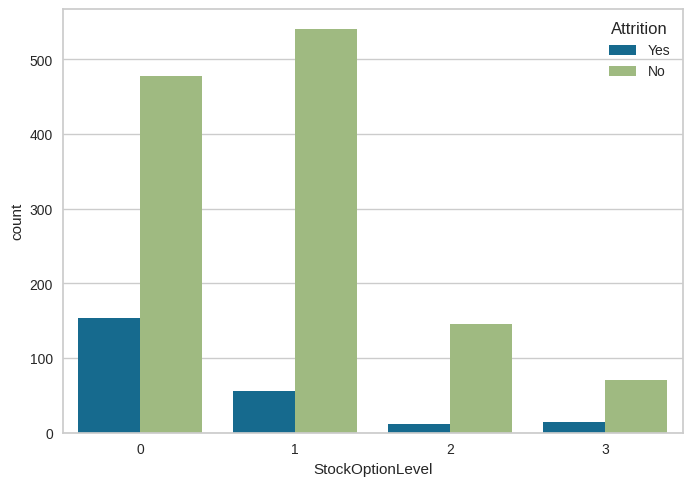

In [ ]:
sns.countplot(x='StockOptionLevel', hue='Attrition', data=ds)

<Axes: xlabel='JobInvolvement', ylabel='count'>

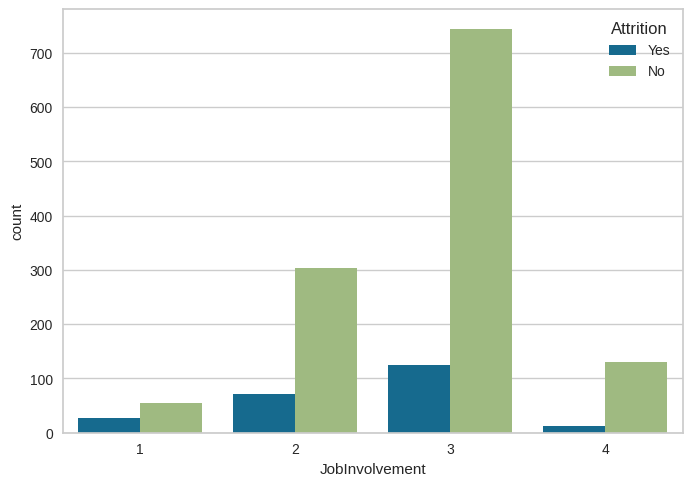

In [ ]:
sns.countplot(x='JobInvolvement', hue='Attrition', data=ds)

<Axes: xlabel='YearsAtCompany', ylabel='count'>

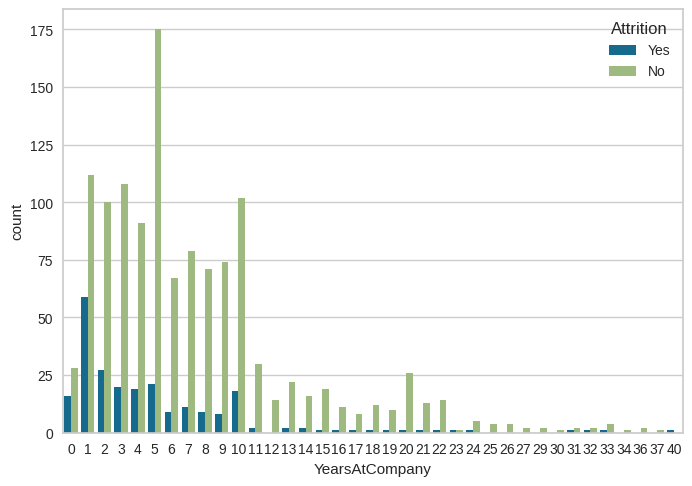

In [ ]:
sns.countplot(x='YearsAtCompany', hue='Attrition', data=ds)

In [ ]:
avg_satisfaction = ds.groupby('Attrition')['JobSatisfaction'].mean()
print(avg_satisfaction)

Attrition
No     2.778589
Yes    2.468354
Name: JobSatisfaction, dtype: float64


In [ ]:
avg_income = ds.groupby('Attrition')['MonthlyIncome'].mean()
print(avg_income)

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64


<Axes: xlabel='Attrition'>

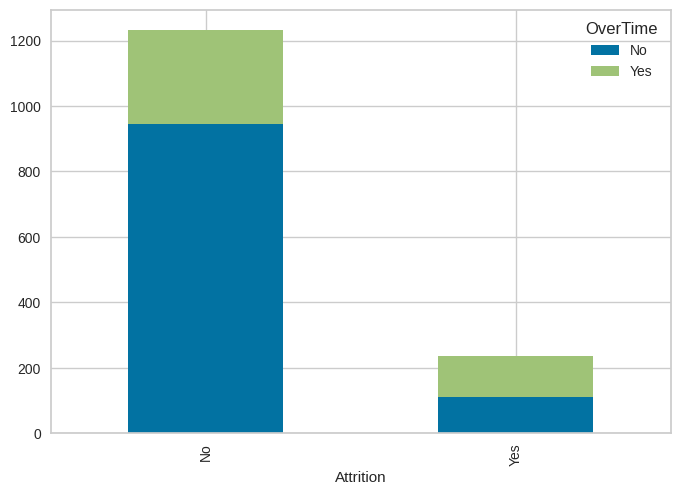

In [ ]:
ds.groupby(['Attrition', 'OverTime']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='Attrition'>

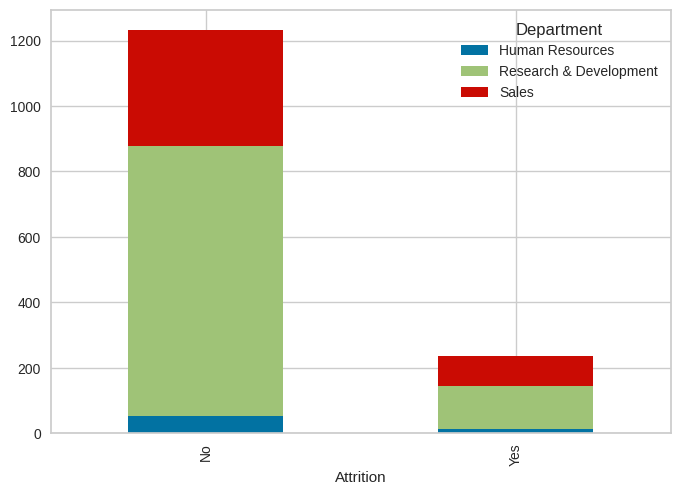

In [ ]:
ds.groupby(['Attrition', 'Department']).size().unstack().plot(kind='bar', stacked=True)


# **Feature Engineering**

In [ ]:
# Labeling the categorical column
for col in ds.columns:
  if ds[col].dtypes=='object':
    le=LabelEncoder()
    ds[col]=le.fit_transform(ds[col])


In [ ]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,1,2,1102,2,1,2,1,1,1,...,80,0,8,0,1,6,4,0,5,30-50
1,49,0,1,279,1,8,1,1,1,2,...,80,1,10,3,3,10,7,1,7,30-50
2,37,1,2,1373,1,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,30-50
3,33,0,1,1392,1,3,4,1,1,5,...,80,0,8,3,3,8,7,3,0,30-50
4,27,0,2,591,1,2,1,3,1,7,...,80,1,6,3,3,2,2,2,2,Under 30


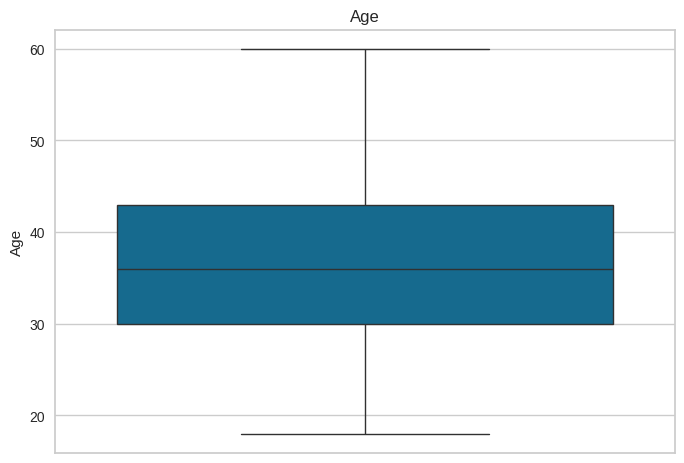

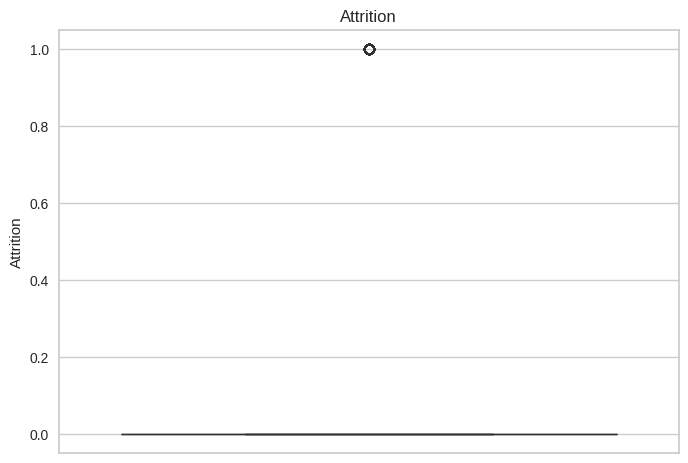

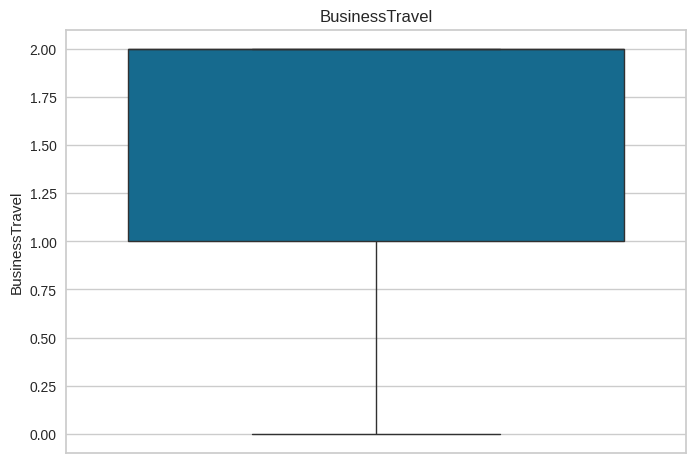

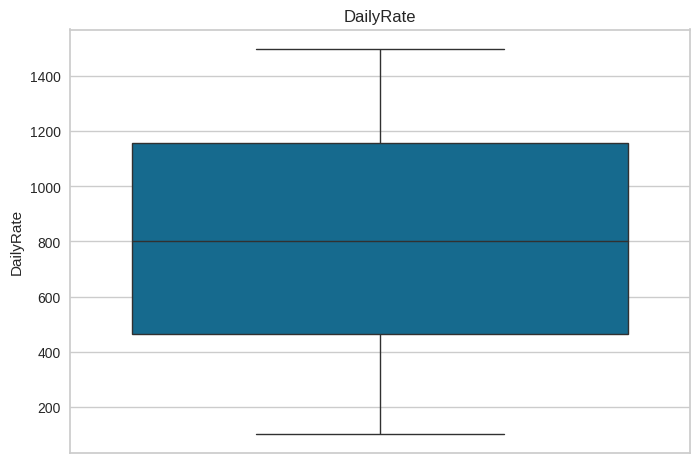

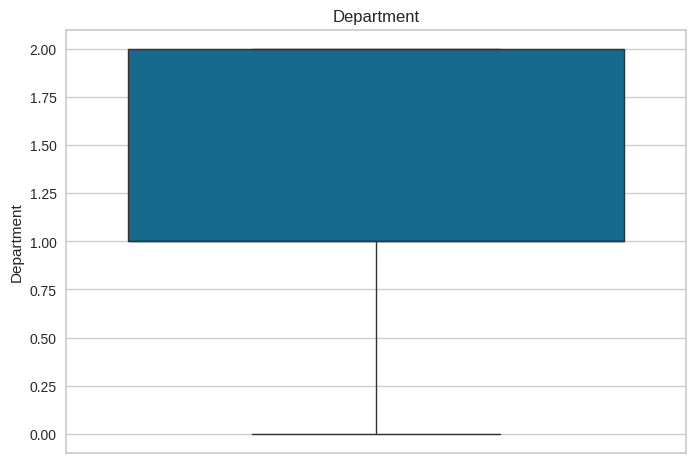

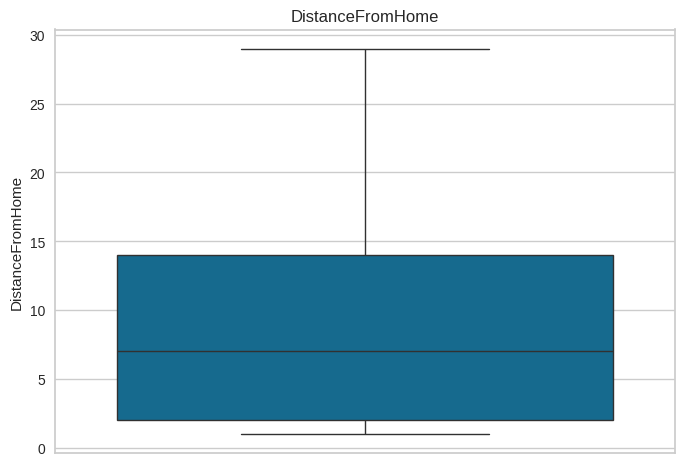

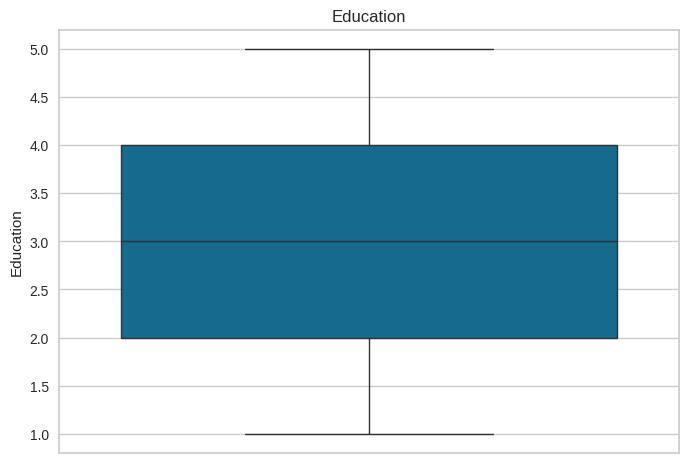

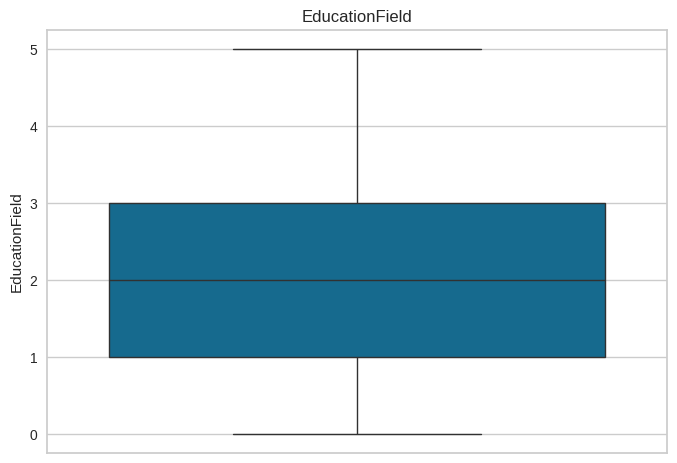

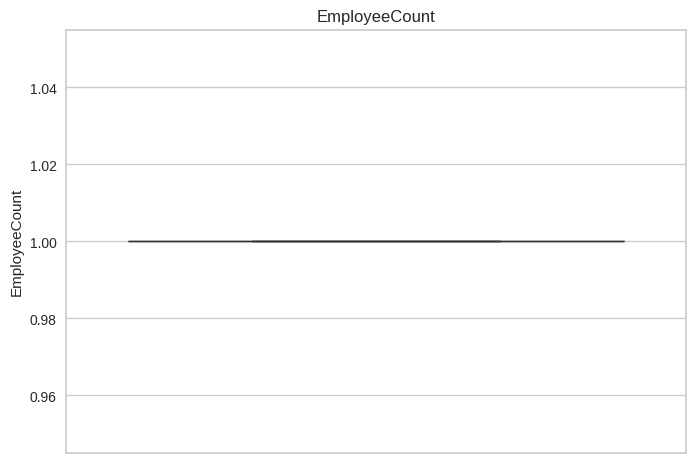

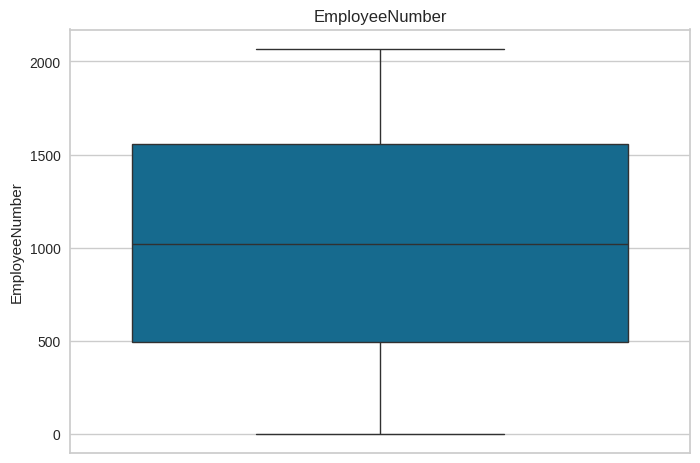

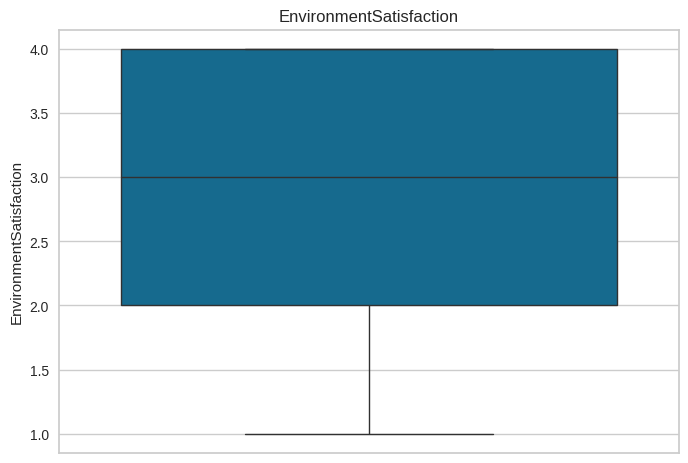

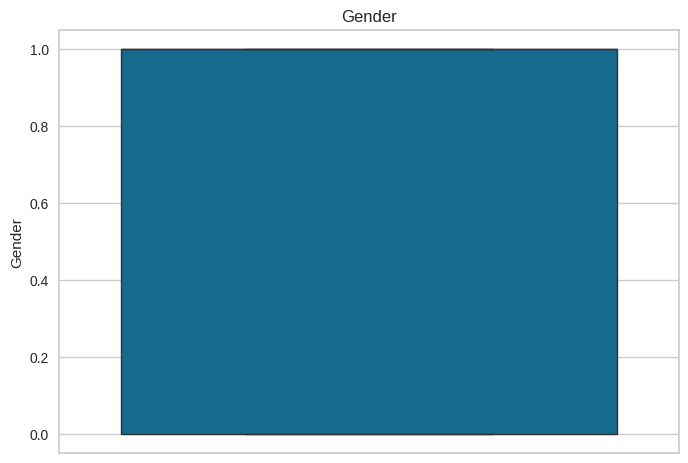

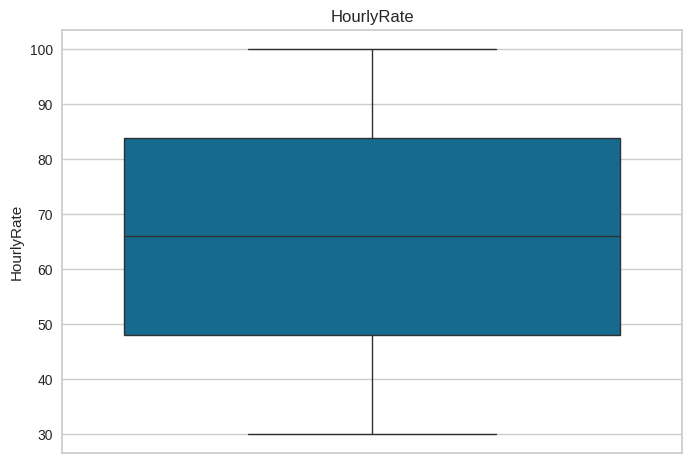

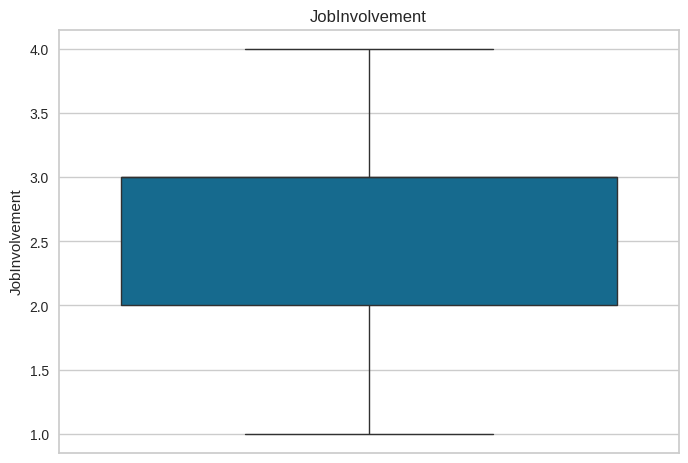

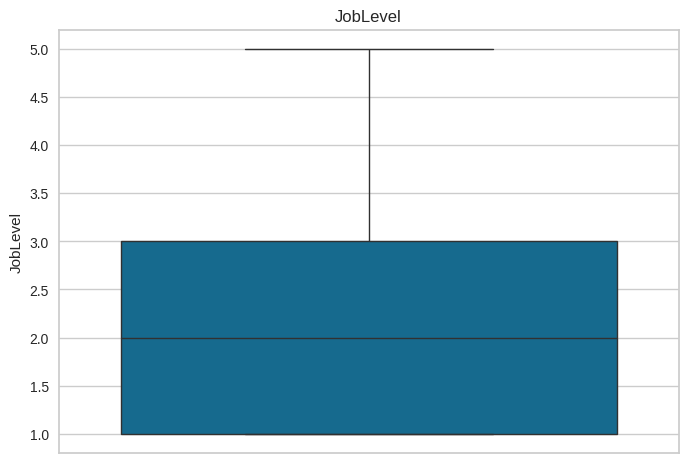

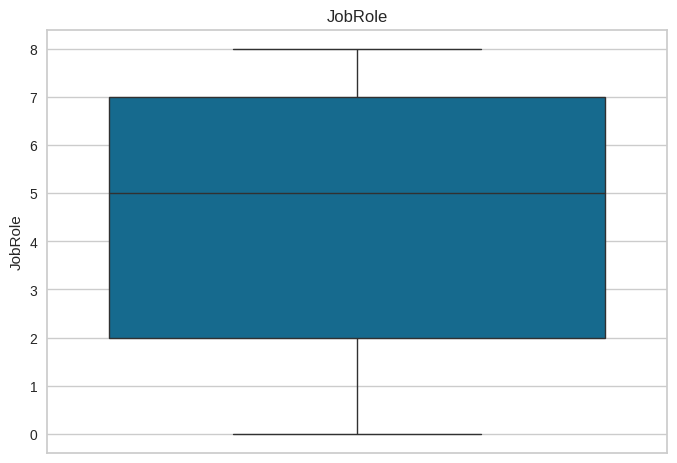

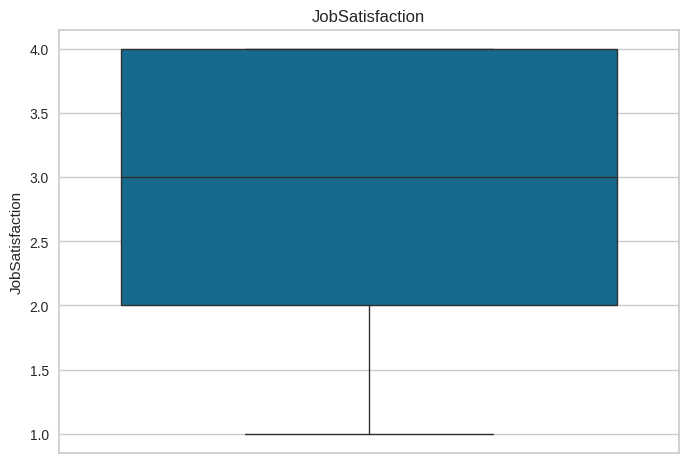

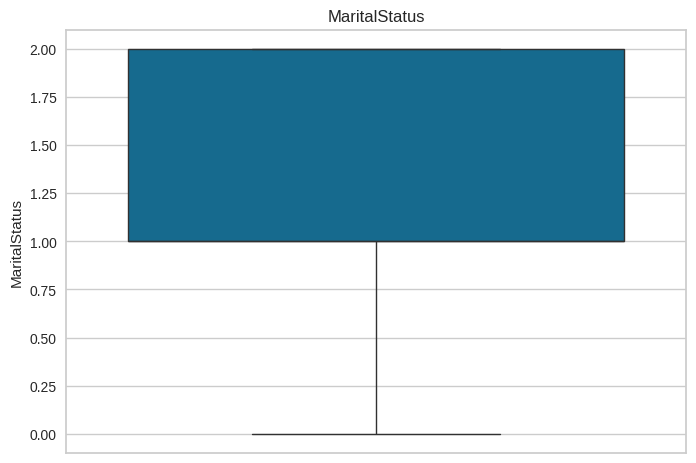

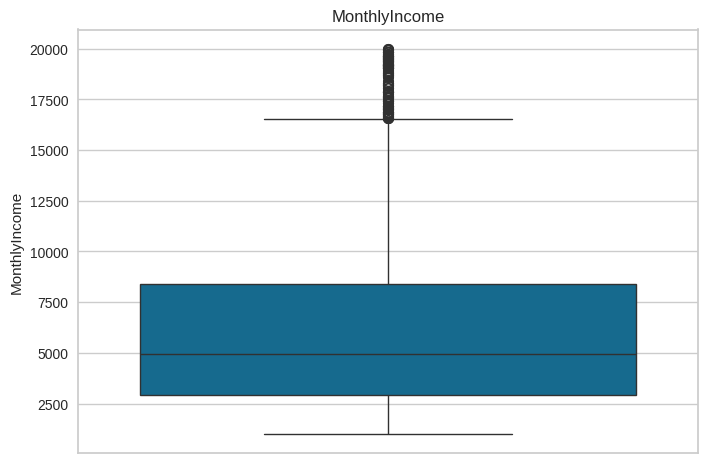

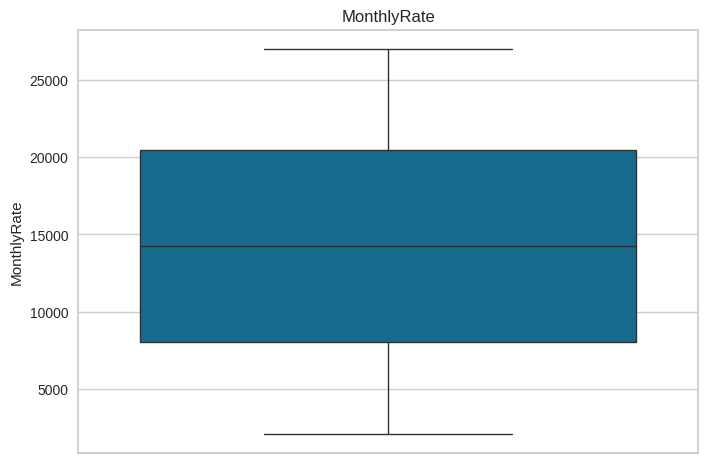

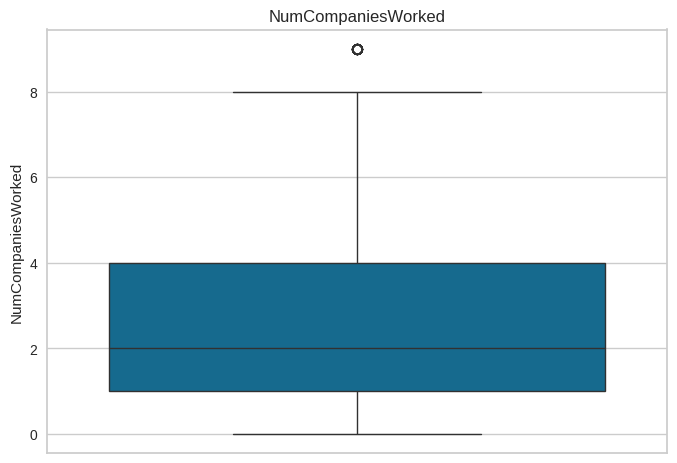

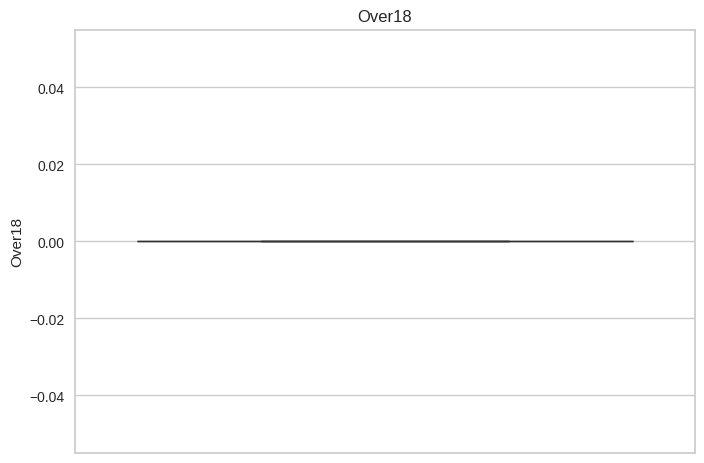

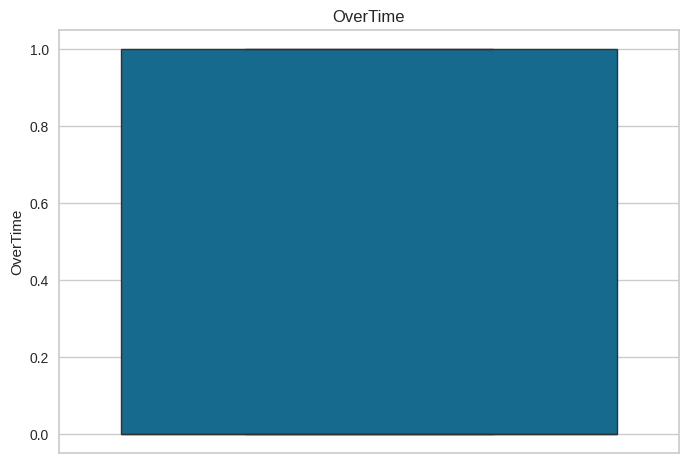

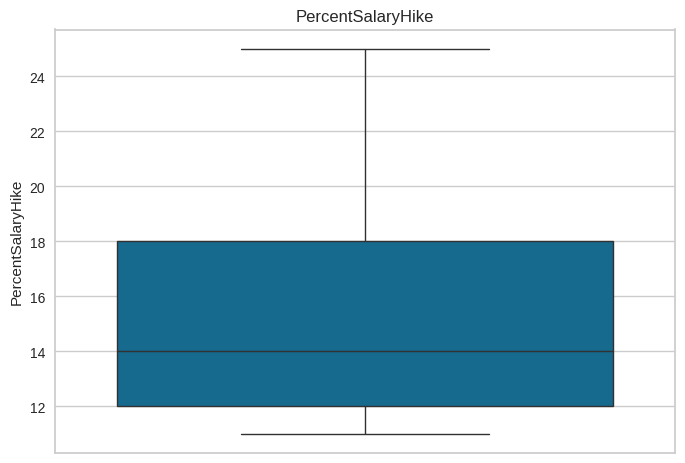

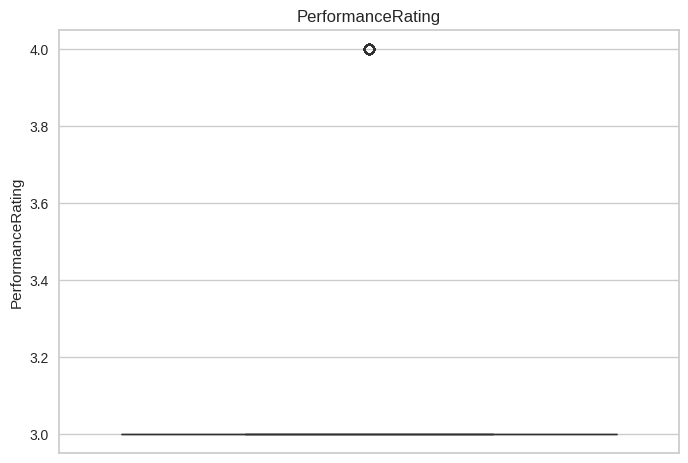

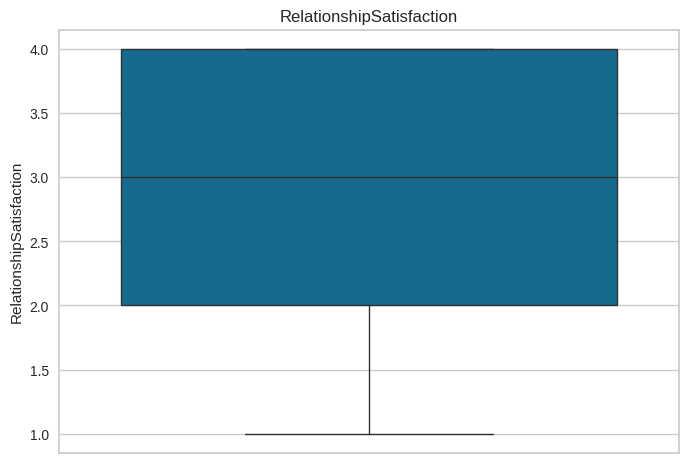

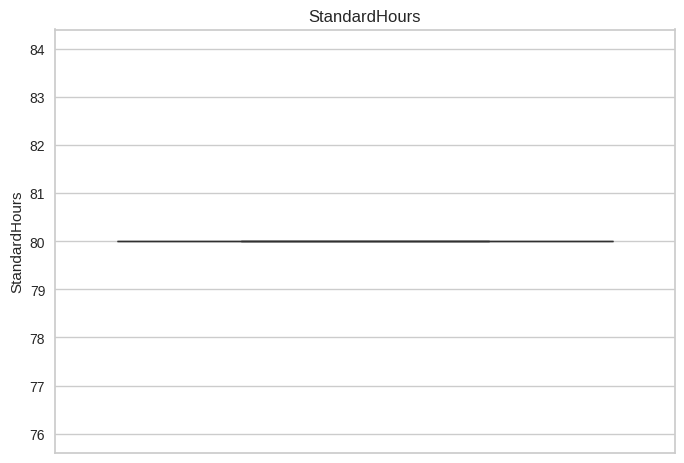

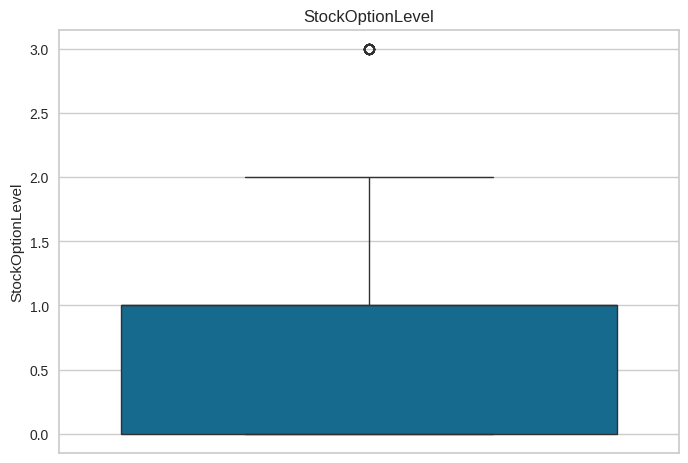

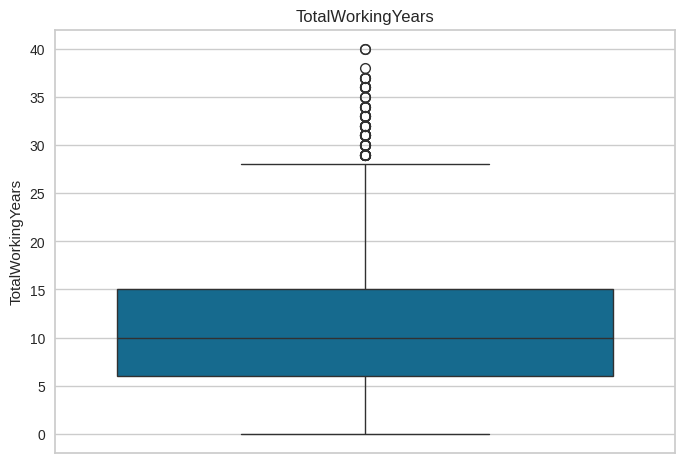

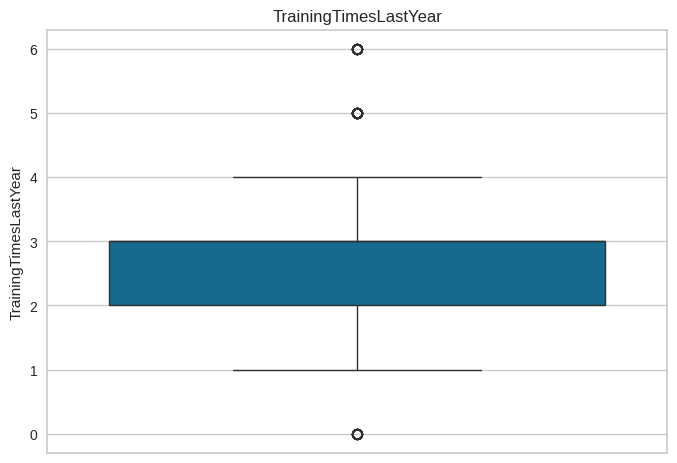

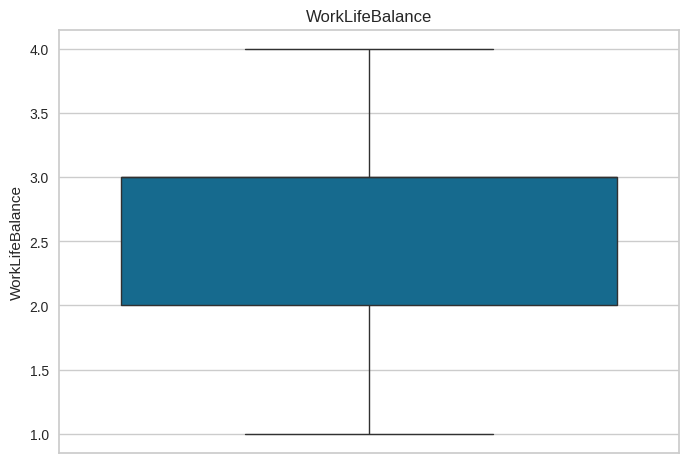

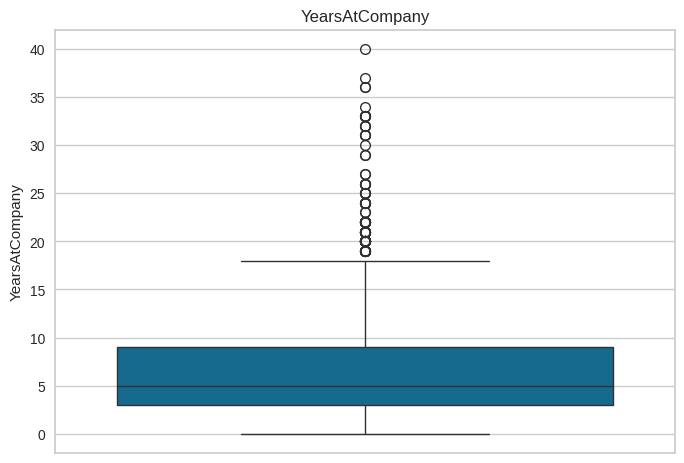

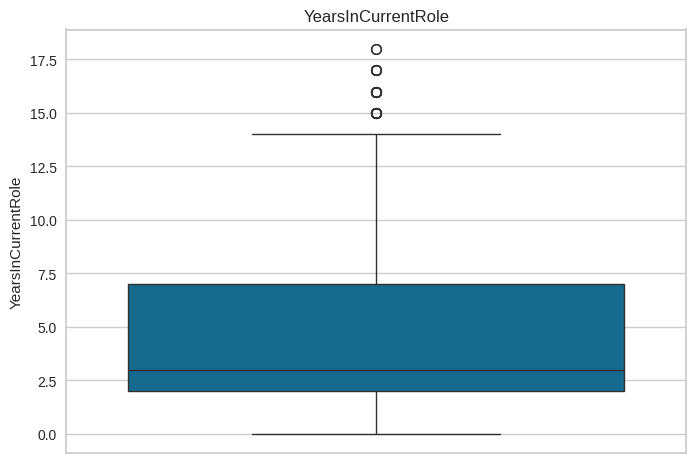

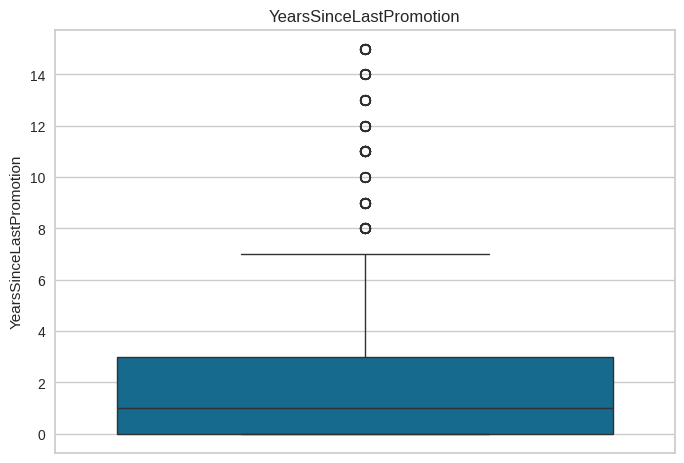

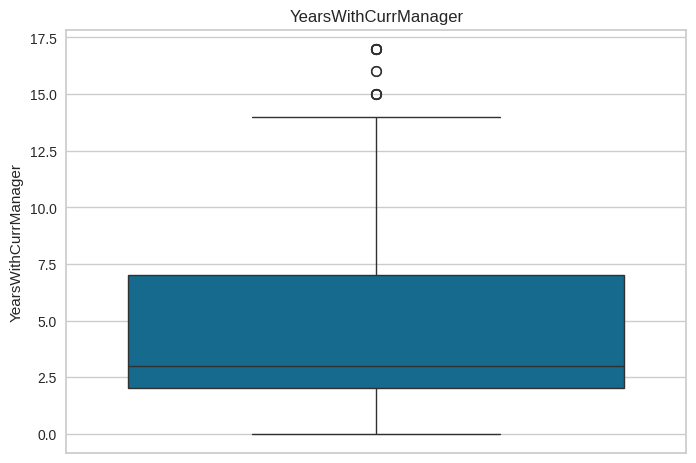

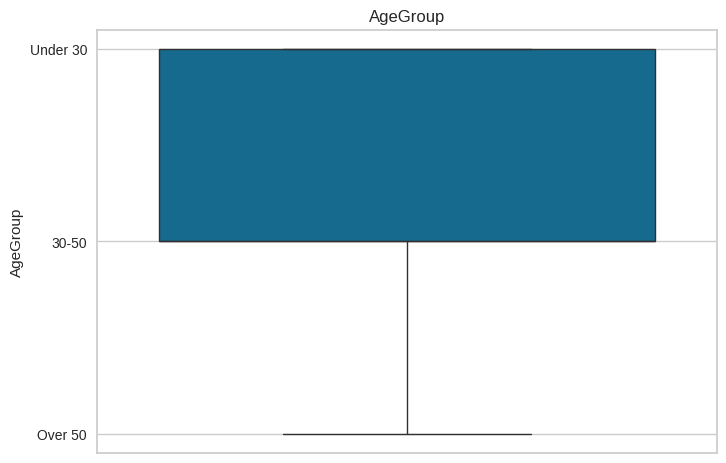

In [ ]:
for col in ds.columns: # checking for outliers in our dataset
  if ds[col].dtypes!='object':
    sns.boxplot(ds[col])
    plt.title(col)
    plt.show()


In [ ]:
col_list=['YearSinceLastPromotion','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','TotalWorkingYears']

for col in col_list:
    if col in ds.columns:  # Check if the column still exists
        Q1 = ds[col].quantile(0.25)
        Q3 = ds[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter outliers for the specific column
        ds = ds[~((ds[col] < lower_bound) | (ds[col] > upper_bound))]
    else:
        print(f"Column {col} not found in DataFrame.")

print(ds.shape)  # Print the shape of the DataFrame to check if it's empty or not

Column YearSinceLastPromotion not found in DataFrame.
(1281, 36)


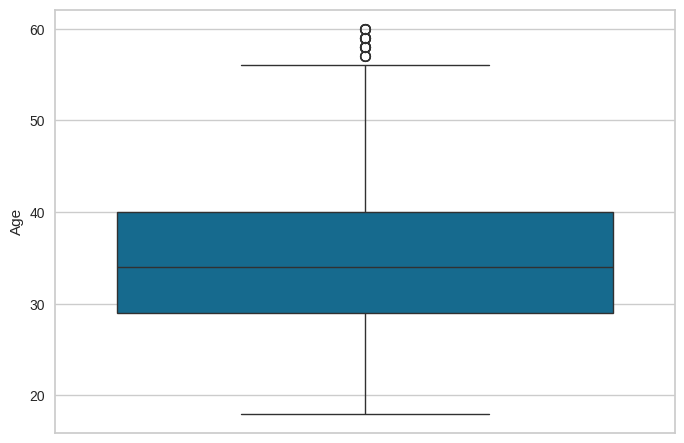

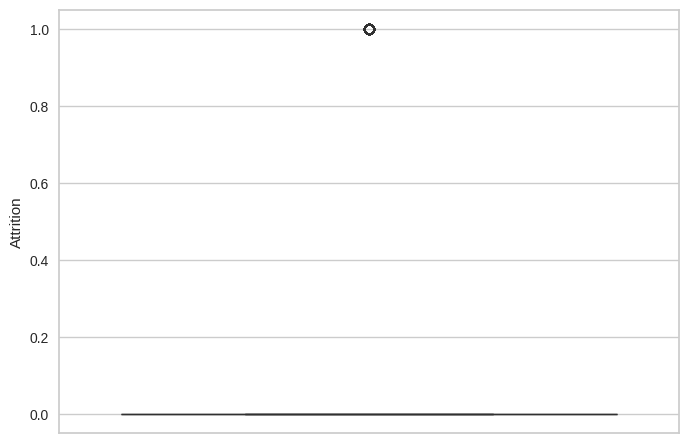

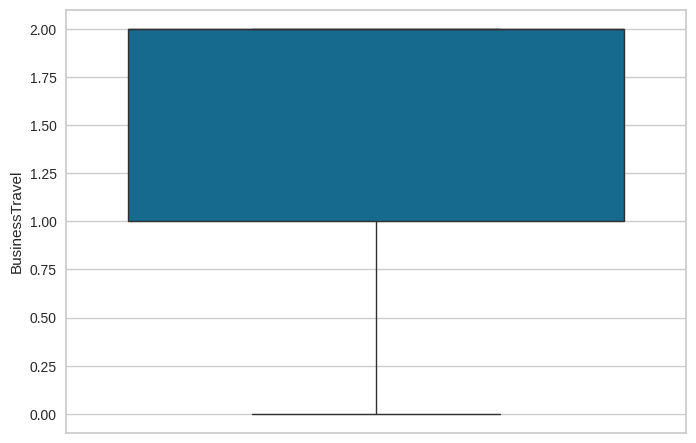

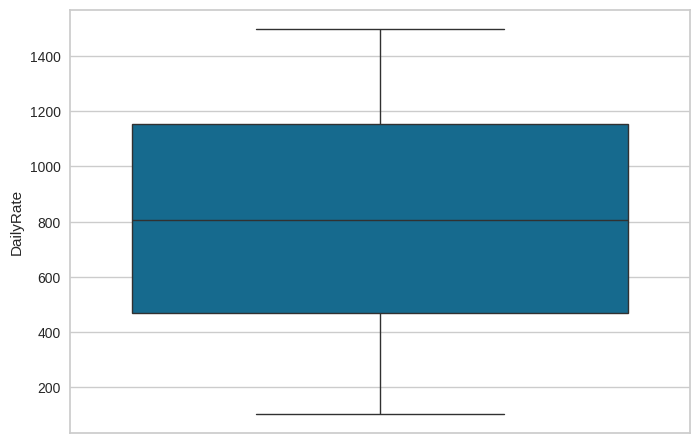

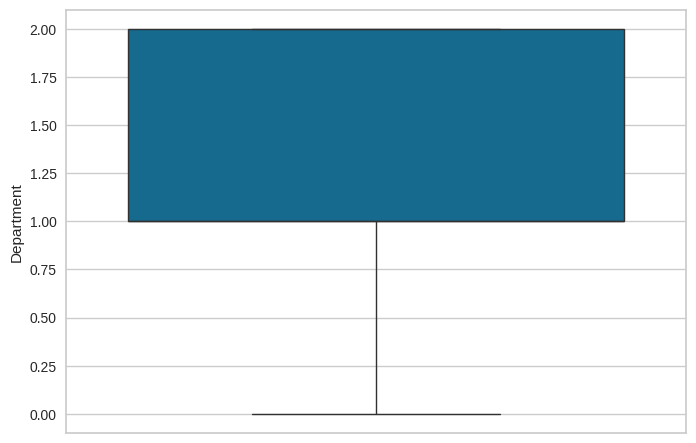

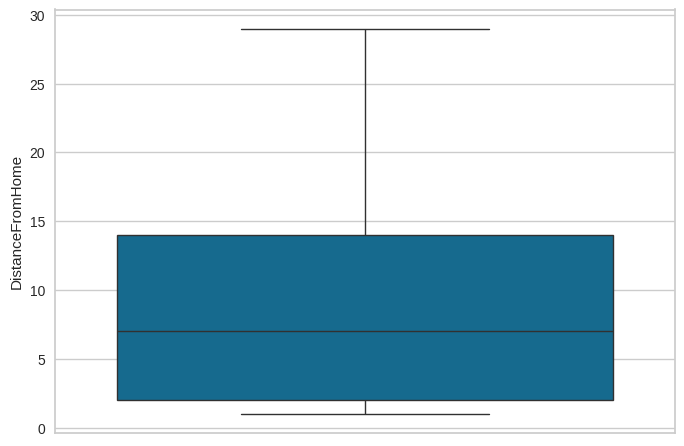

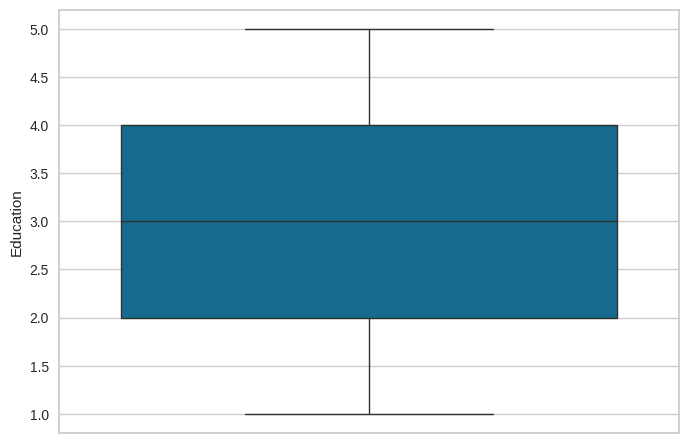

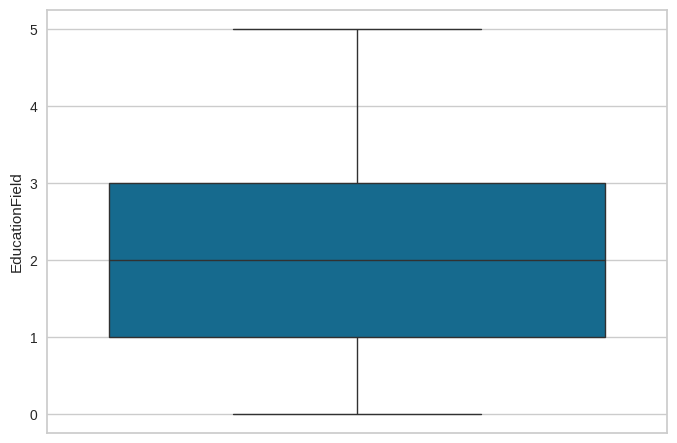

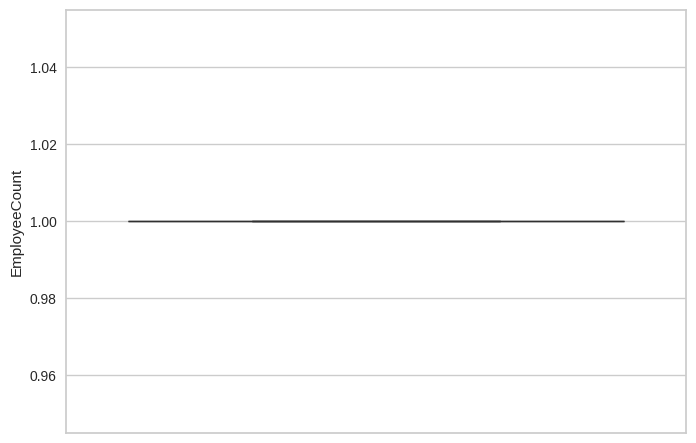

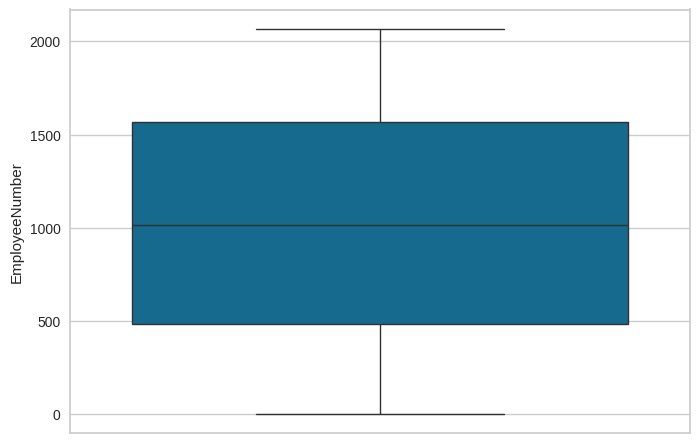

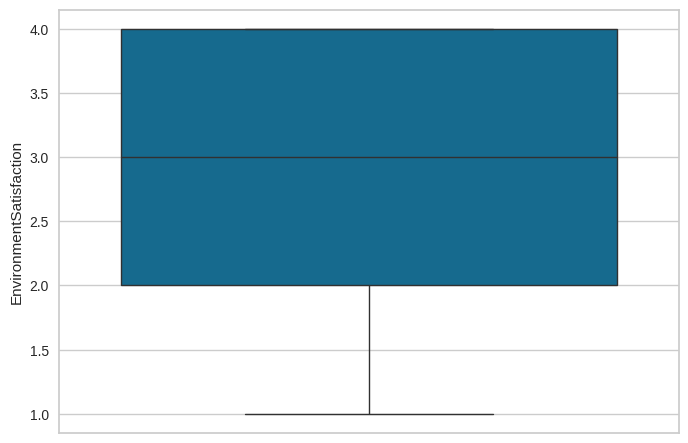

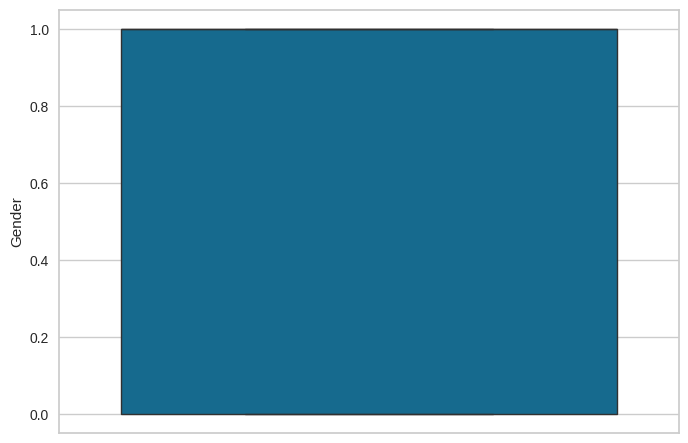

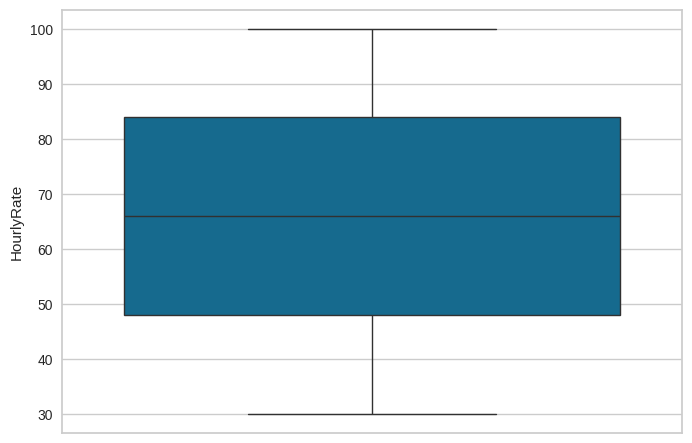

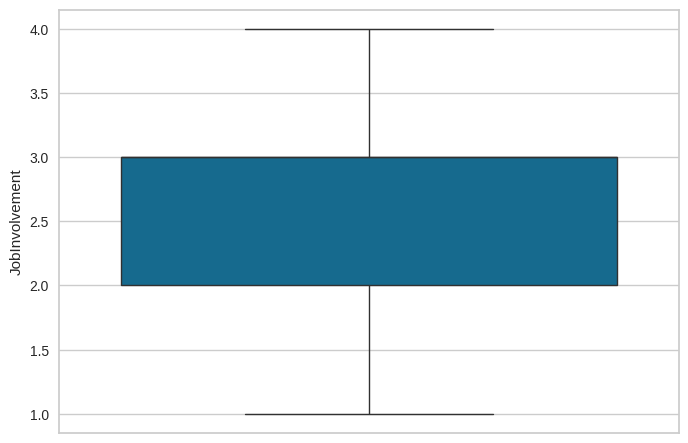

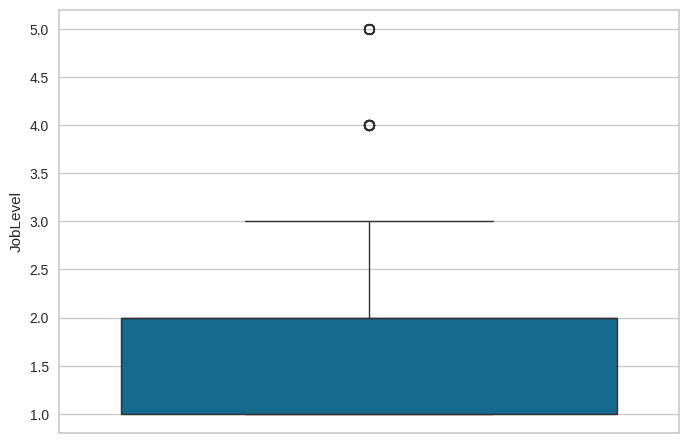

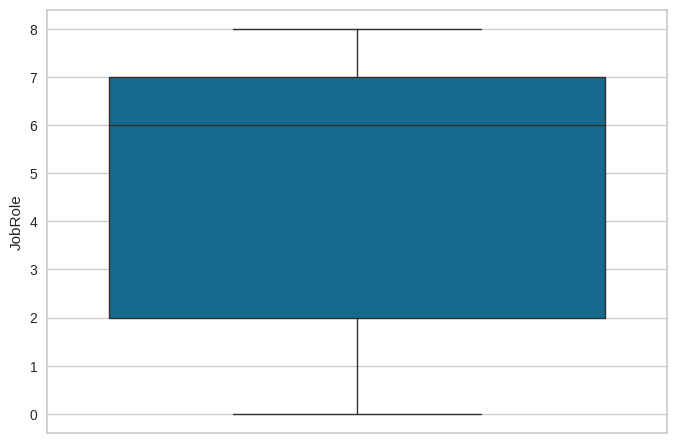

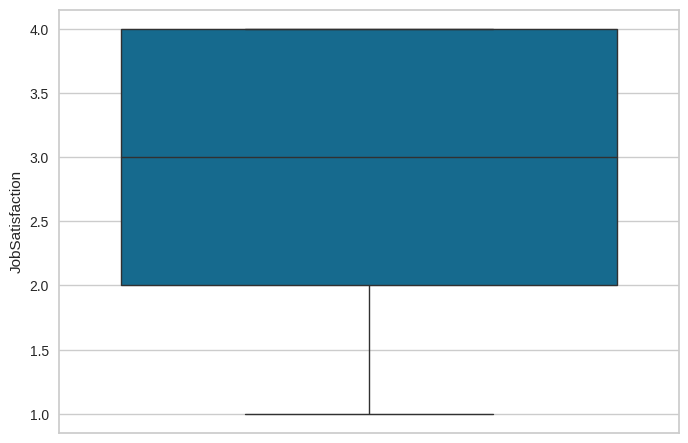

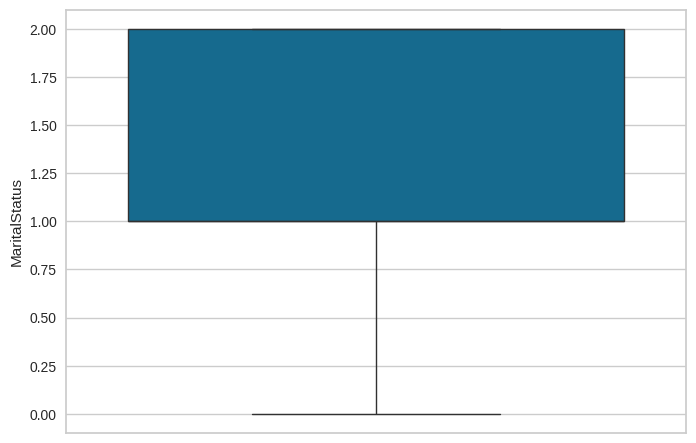

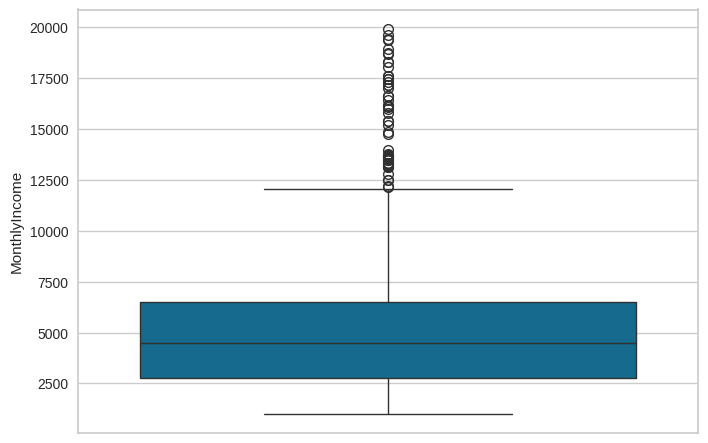

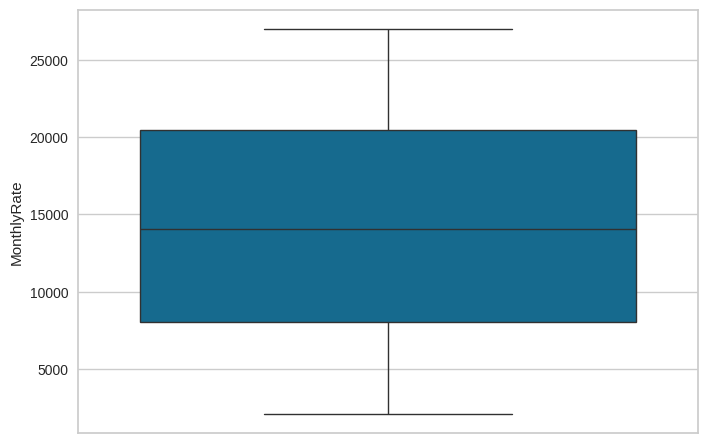

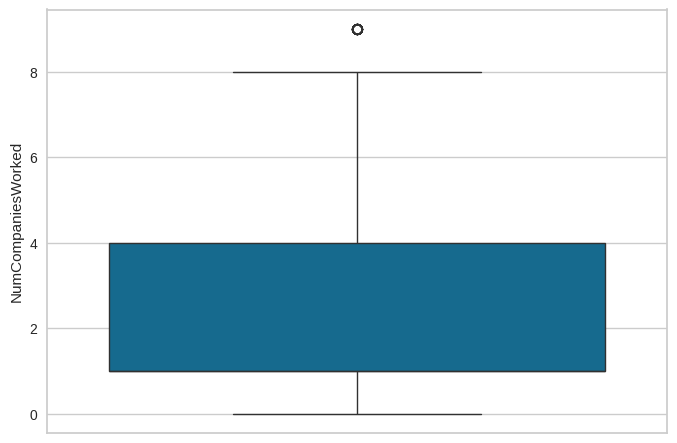

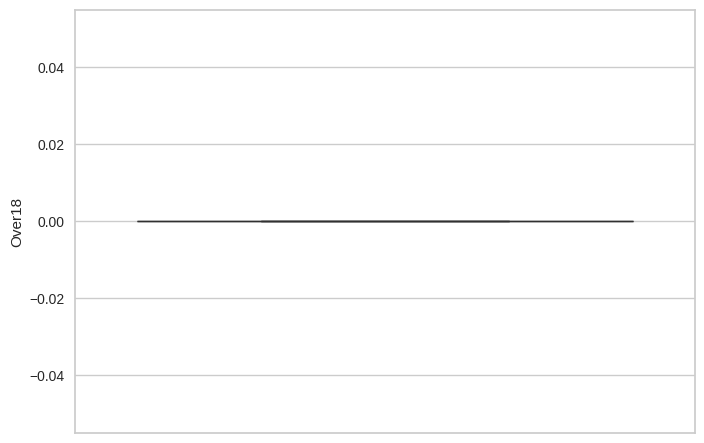

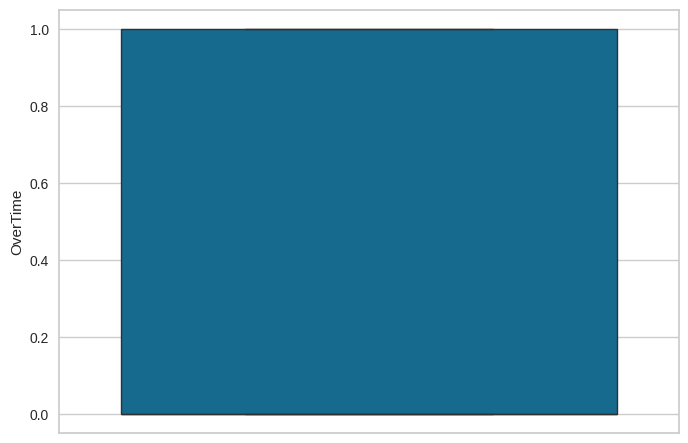

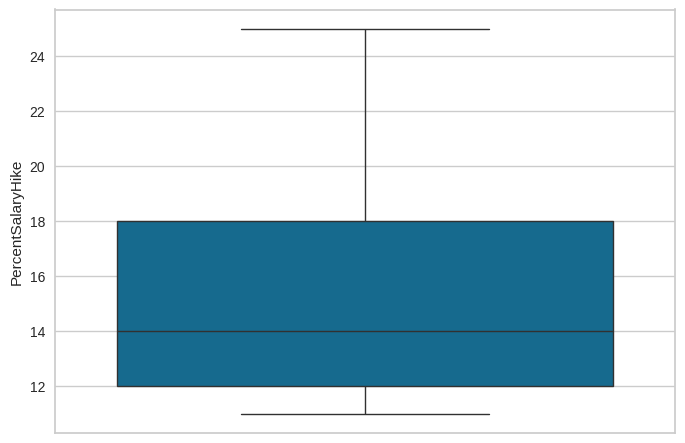

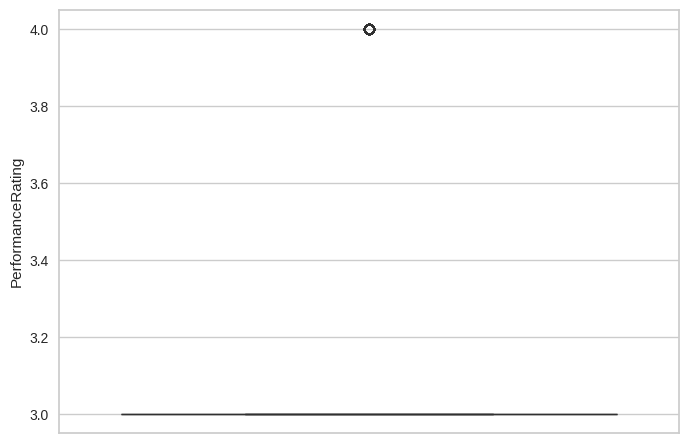

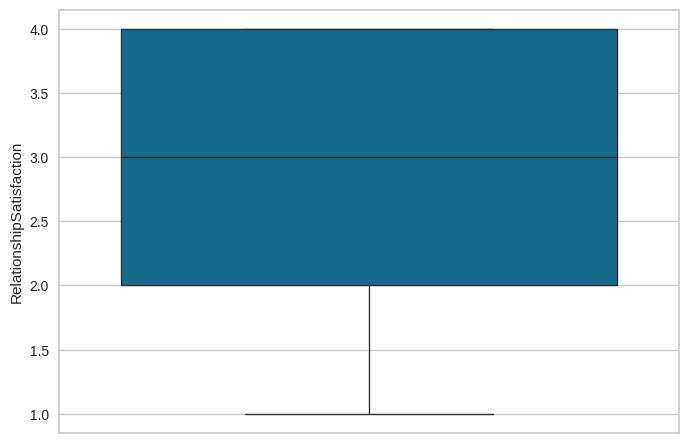

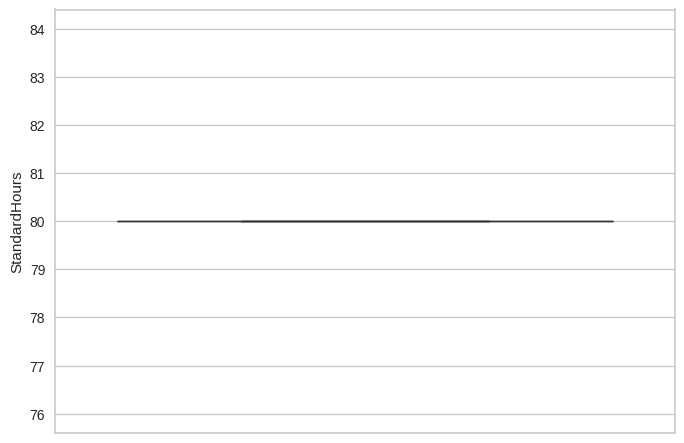

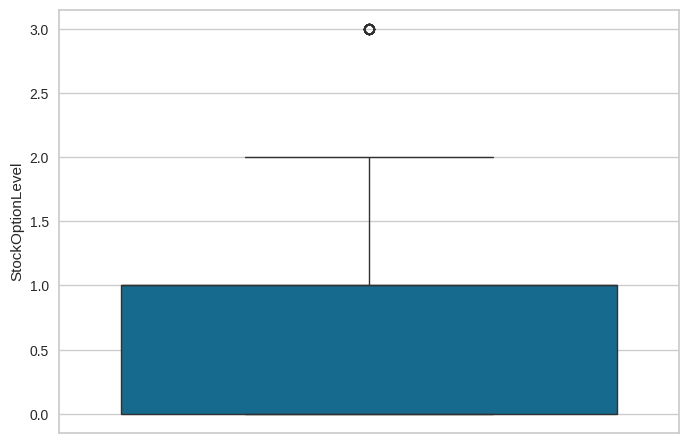

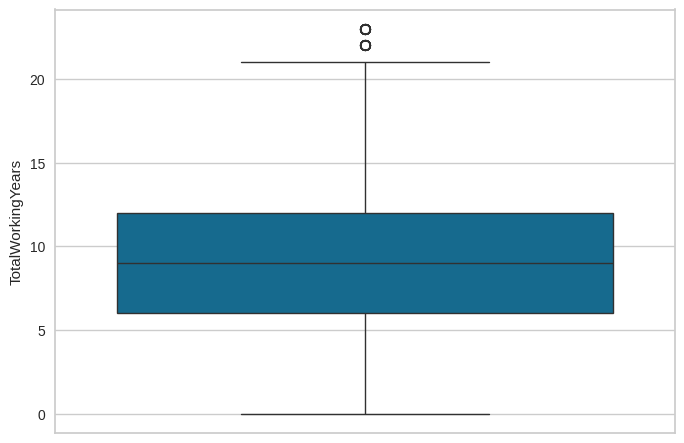

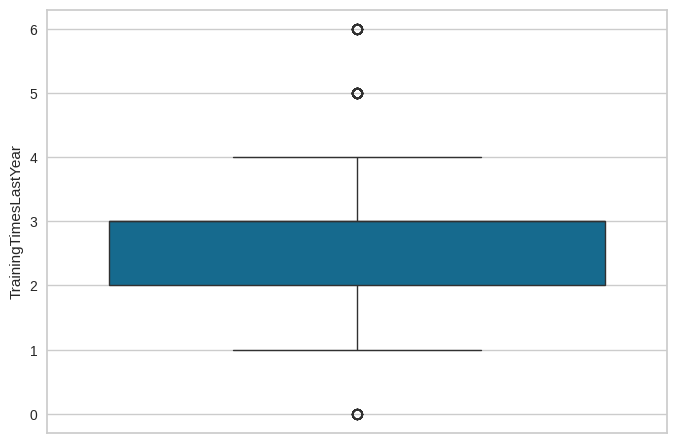

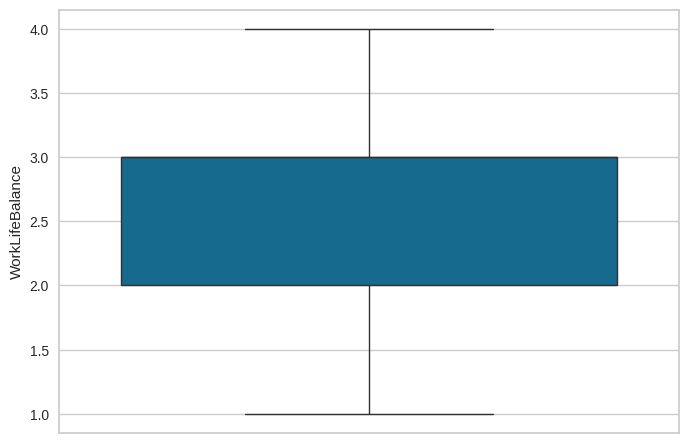

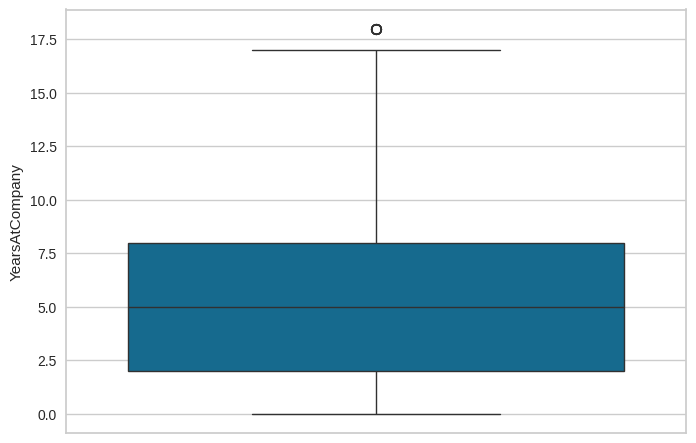

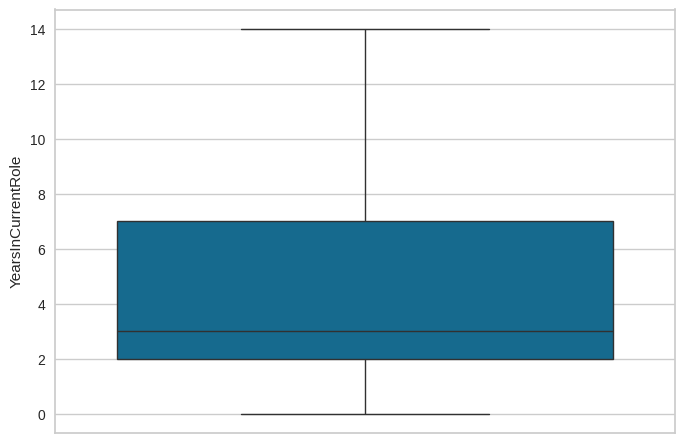

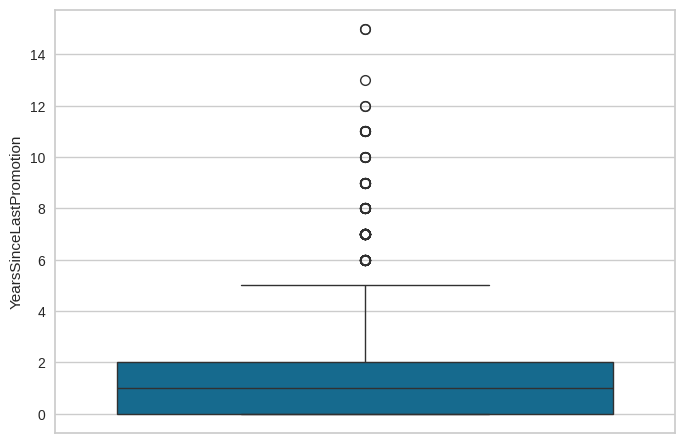

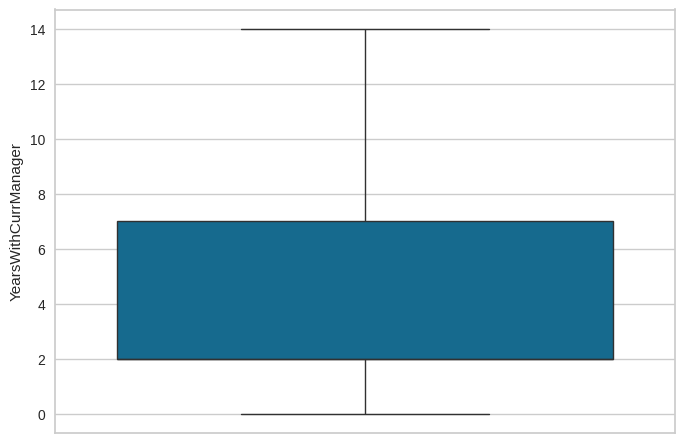

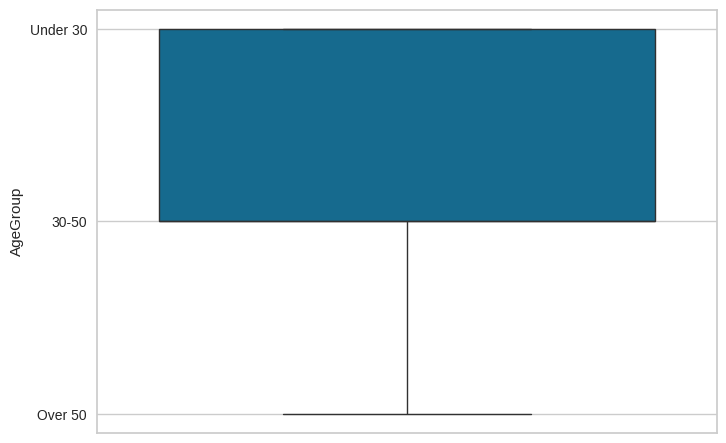

In [ ]:
for i in ds.columns: # rechecking the outliers once again
  if ds[i].dtypes!='object':
    sns.boxplot(ds[i])
    plt.show()

In [ ]:
X=ds.drop(['Attrition','AgeGroup'],axis=1) # containg all column except attrition Column and we drop AGe group column beacuse it contain same information as age column
y=ds['Attrition']  # contain Attrition column

In [ ]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y) # use stratify to overcome the effect of inbalance data

In [ ]:
# Use Standard Sclaerfor sclaing all the data in same unit
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(x_train) # Scaling our train data
X_test_scaled = sc.transform(x_test) # Scaling our Test data

In [ ]:
X_train_scaled


array([[ 0.10133707,  0.58537953, -0.33397574, ..., -1.17001113,
        -0.69156407, -1.16117057],
       [ 0.10133707, -0.93601296, -0.80685215, ...,  1.92663243,
        -0.69156407,  1.07086769],
       [ 0.10133707,  0.58537953, -1.56196894, ...,  1.61696808,
         2.9297169 , -1.16117057],
       ...,
       [-0.98969383, -0.93601296, -0.0046953 , ..., -0.55068241,
        -0.69156407, -1.16117057],
       [ 0.10133707,  0.58537953,  0.93858174, ...,  0.0686463 ,
        -0.69156407, -0.84230796],
       [-0.62601687, -0.93601296,  1.28024114, ...,  0.99763936,
        -0.69156407,  1.07086769]])

# **DATA MODELING**

In [ ]:
from pycaret.classification import *
exp_clf101 = setup(data = ds, target = 'Attrition', session_id=123)
best_model= compare_models()

,Description,Value
0,Session id,123
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(1281, 36)"
4,Transformed data shape,"(1281, 38)"
5,Transformed train set shape,"(896, 38)"
6,Transformed test set shape,"(385, 38)"
7,Numeric features,34
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8571,0.8002,0.3350,0.6718,0.4419,0.3728,0.4039,0.1660
ridge,Ridge Classifier,0.8560,0.8260,0.2225,0.8911,0.3399,0.2930,0.3852,0.0620
gbc,Gradient Boosting Classifier,0.8549,0.7969,0.3233,0.6927,0.4289,0.3603,0.3997,0.5690
lda,Linear Discriminant Analysis,0.8526,0.8258,0.3933,0.6572,0.4853,0.4051,0.4273,0.0660
lightgbm,Light Gradient Boosting Machine,0.8516,0.8068,0.3250,0.6689,0.4335,0.3599,0.3931,1.4030
rf,Random Forest Classifier,0.8471,0.7918,0.1583,0.8750,0.2640,0.2214,0.3256,0.3160
ada,Ada Boost Classifier,0.8460,0.7891,0.3808,0.6117,0.4636,0.3793,0.3970,0.3080
et,Extra Trees Classifier,0.8449,0.7872,0.1712,0.7767,0.2729,0.2251,0.3073,0.2310
dummy,Dummy Classifier,0.8248,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0840
lr,Logistic Regression,0.8225,0.7649,0.1896,0.5139,0.2650,0.1892,0.2243,0.8190


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Ridge classifer have more AUC score  and XG boots have best Accuracy sore incomparison of other that's whay we prefer them here by which our model became more accurate and get better prediction
--AUC- (Area Under Curve) ia a curve that maps the relationship between the true postive rate and false postive rate of model across different thresholds.The highe the AUC, better the model. Used in inbalace data.

In [ ]:
rc= RidgeClassifier()
rc.fit(X_train_scaled,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=None, solver='auto',
                tol=0.0001)

In [ ]:
# Predicting our data using our model
pred=rc.predict(X_test_scaled)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
accuracy=accuracy_score(y_test,pred)
print(accuracy)

0.8365758754863813


In [ ]:
from xgboost import XGBClassifier # Importing the XGBClassifier

xbg = XGBClassifier() # Initialize the XGBoost classifier
xbg.fit(X_train_scaled,y_train) # Train the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [ ]:
pred2=xbg.predict(X_test_scaled)

In [ ]:
accuracy2=accuracy_score(y_test,pred2)
print(accuracy2)

0.8326848249027238


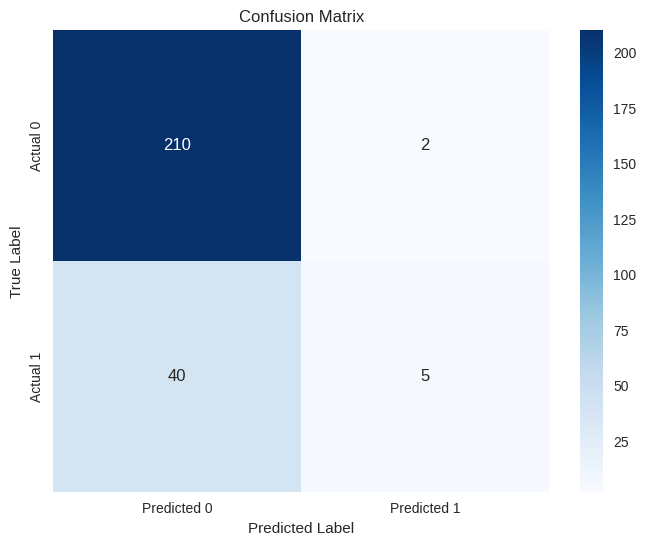

In [ ]:
# visualize the confusion matrix for Ridge Classifier
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

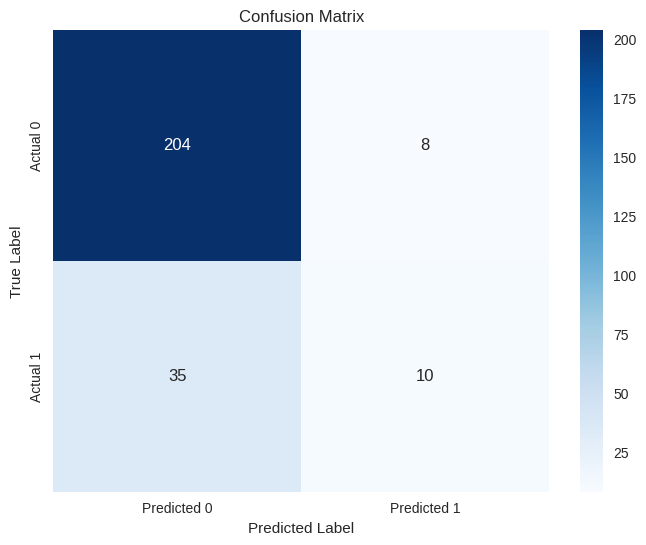

In [ ]:
# visualize the confusion matrix for XG Boost
cm=confusion_matrix(y_test,pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Deployment Of the Model**

In [ ]:
# use pickle library for the deployment of the model
pc.dump(rc,open('Ridge.pkl','wb'))

In [ ]:
pc.dump(rc,open('XGBoost.pkl','wb'))